In [1]:
# imports
import altair as alt
import pandas as pd
import sys
import os
# altair specific
alt.data_transformers.disable_max_rows()
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
# adds parent directory to this notebook, so it could use relative import
sys.path.append(os.path.dirname(os.getcwd()))

# user defined modules
from src.helpers import get_data


In [4]:
# read data here
data_path = "../data/player_raw_data.csv"
# this is raw data
fifa = get_data(data_path)
# this is processed for Task 5 specific
fifa_processed = get_data(data_path, preprocess=True)

Improvements Task 4:
- No need to facet by region, instead use dropdown for region / country
- Then facet by preferred_foot
- And, if you find it too simple, maybe we could modify task as well

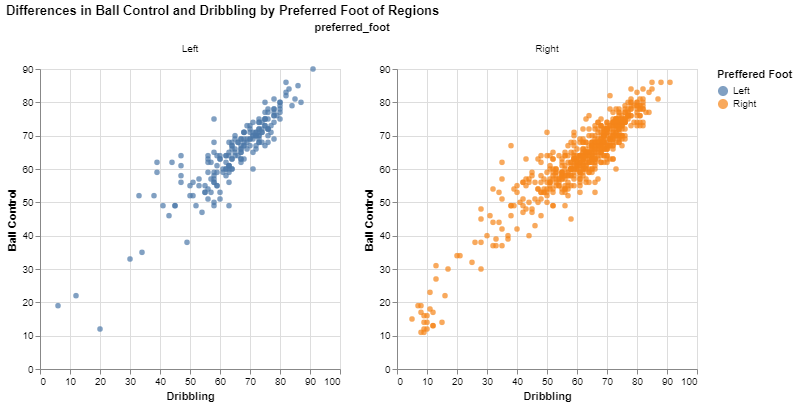

In [27]:
# 4.Explore the differences in ball control and dribbling between someone whose preferred leg is left vs right.
def task_four_viz(data):
    # dropdown click
    regions = sorted(data.region.unique().tolist())
    
    # Dropwdown menu, initial attribute is age
    dropdown = alt.selection_single(
        name="Select",
        init={"region": "Africa"},
        bind={"region": alt.binding_select(options=regions),
             }
        )
    
    bc_dri_facet_plot = alt.Chart(data).mark_circle().encode(
        x = alt.X("dribbling", title="Dribbling"),
        y = alt.Y("ball_control", title="Ball Control"),
        color = alt.Color("preferred_foot:N", title="Preffered Foot"),
        tooltip=["name", "dribbling", "ball_control"]
    ).properties(
        width = 300,
        height = 300
    ).facet(
        facet="preferred_foot",
        columns=2,
        title="Differences in Ball Control and Dribbling by Preferred Foot of Regions"
    ).resolve_axis(
        x='independent',
        y='independent'
    ).resolve_scale(
        x='independent', 
        y='independent'
    ).add_selection(dropdown).transform_filter(dropdown)
    return bc_dri_facet_plot

t4_plot = task_four_viz(data=fifa_processed)
t4_plot